In [ ]:
import plotly
import pandas as pd

In [ ]:
plotly.tools.set_credentials_file(username='msing100', api_key='1nmwaz3euc')

In [ ]:
from plotly.graph_objs import Scatter, Layout

In [ ]:
plotly.offline.init_notebook_mode()

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="sample try")
})


In [ ]:
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go

df = pd.read_csv('TempDiff.csv')
df

data = [ dict(
        type = 'choropleth',
        locations = df['ISO3'],
        z = ((df['TempDiff']/10)*1.8)+32,
        
        colorscale = [[0,"rgb(255, 67, 0)"],[0.2,"rgb(255, 155, 0)"],[0.4,"rgb(255,243, 1)"],\
            [0.6,"rgb(179, 255, 1)"], [0.8,"rgb(2,255, 174)"], [0.9,"rgb(2, 248, 255)"], [1,"rgb(2, 161, 255)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            ticksuffix ='F',
            title = 'Average Temperature around World in past 100 Years'),
      ) ]

layout = dict(
    title = 'Average Temperature Difference around World from 1914 to 2014',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    ), 
    autosize=False,
    width=5000,
    height=5000,
    margin=go.Margin(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
        ),
)


    

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='maps' )



py.image.save_as(fig,'plot4.png')

Image('plot4.png')


In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df.plot(subplots=True);

NameError: name 'df' is not defined

In [4]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import datetime
from dateutil import parser
from pandas import Series, DataFrame


In [5]:
parse = lambda x: datetime.strptime(x, '%Y-%m')


In [6]:
mdata = pd.read_csv('series.csv')
mdata.head(5)

#df.apply(lambda x: pandas.datetime.strptime("{0} {1} {2} 00:00:00".format(x['year'],x['month'], x['day']), "%Y %m %d %H:%M:%S"),axis=1)

#from datetime import datetime
#mdata['date']= mdata.apply(lambda x: datetime(x['Year'],x['month']),axis=1)
#mdata.index= mdata['date']

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryCode,Year,month,Element,X_c4,Unnamed: 5
0,AS,1972,7,DAPR,0.257286,NaN
1,AS,1978,12,PRCP,2.31696,NaN
2,AS,1991,4,MDPR,9.95315,NaN
3,AS,2007,10,DWPR,0.239926,NaN
4,AS,2008,8,PRCP,1.1385,NaN


In [ ]:
from datetime import datetime
mdata['date'] = mdata.apply(lambda x: datetime.strptime("{0} {1}".format(x['Year'],x['month']), "%Y %m"),axis=1)
mdata = mdata.sort(['date'])
mdata.head(20)

In [ ]:
mdata.index =mdata['date']

In [ ]:
#filter acc. to country code and max temp
mdata = mdata[mdata['CountryCode'] == 'US']
mdata = mdata[mdata['Element'] == 'TMAX']

In [ ]:
mdata.head(6)

In [ ]:
ts2 = mdata['X_c4']
ts2.head(10)


In [ ]:
from datetime import datetime
ts2[datetime(1990,1,1)]

ts3 = ts2['1990-01-01':'2016-01-01']


In [ ]:
ts3.head(10)

In [ ]:
plt.plot(ts3)

In [ ]:
import pandas as pd
def year_and_season(x):
    season = lookup[x.month]
    year = x.year
    if x.month == 12:
        year += 1
    return (year, season)

In [ ]:
mdata['month'] = mdata.index.month

In [ ]:
mdata.head()

In [ ]:
def season_type(df):
    m = int(df['Month'])
    spring = range(3, 7)
    summer = range(7, 10)
    fall = range(10, 13)
    if m in spring:
        season = "Spring"
    elif m in summer:
        season = "Summer"
    elif m in fall:
        season = "Fall"
    else:
        season = "Winter"
    return season

# applying the Function to the dataframe
mdata['Season'] = mdata.apply(season_type, axis = 1)


In [ ]:
mdata.head()

NameError: name 'search' is not defined

In [166]:
mdata['season' == "winter"]

KeyError: False

In [96]:
decomposition = seasonal_decompose(ts3, freq=12)  
#fig = plt.figure()  
#fig = decomposition.plot()  
#fig.set_size_inches(15, 8)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [97]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.residual  

NameError: name 'decomposition' is not defined

In [103]:
#check stationarity of temperature  
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    #rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test to test the weather time series is stationary or not
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()



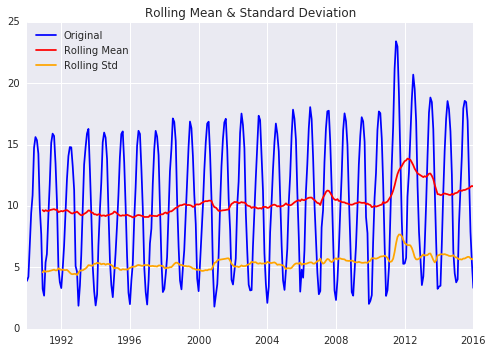

Results of Dickey-Fuller Test:


TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [104]:
test_stationarity(ts3)

In [68]:
ts3_log = np.log(ts3)
plt.plot(ts3_log)

AttributeError: 'float' object has no attribute 'log'

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()



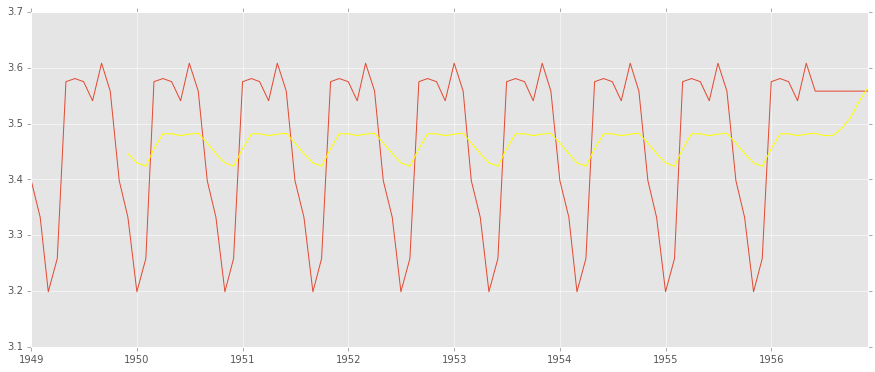

In [234]:
moving_avg = pd.rolling_mean(ts1_log,12)
plt.plot(ts1_log)
plt.plot(moving_avg, color='yellow')

In [235]:
ts1_log_moving_avg_diff = ts1_log - moving_avg
ts1_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.114071
Name: avgt, dtype: float64

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()



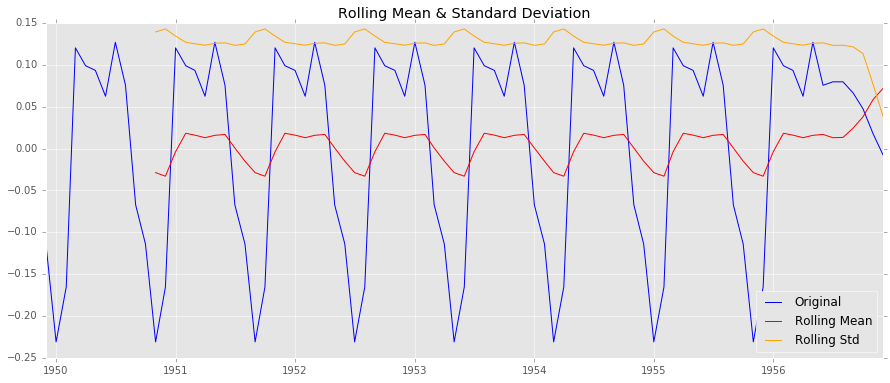

Results of Dickey-Fuller Test:
Test Statistic                  3.087827
p-value                         1.000000
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
Critical Value (1%)            -3.524624
dtype: float64


In [236]:
ts1_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts1_log_moving_avg_diff)

/Users/mohitsingh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,halflife=12,ignore_na=False,adjust=True).mean()



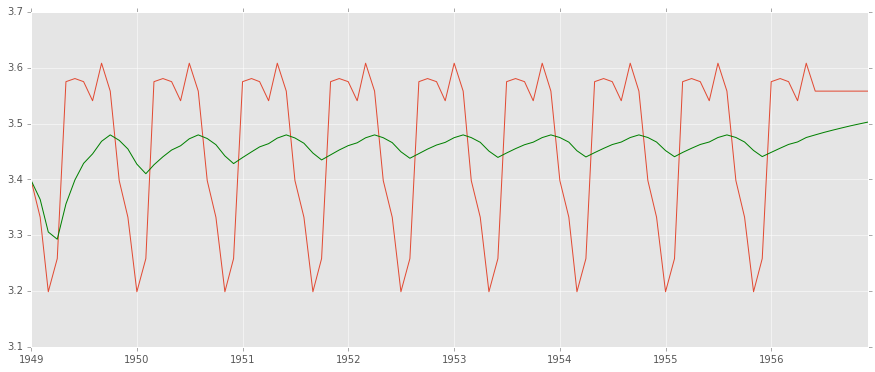

In [237]:
expwighted_avg = pd.ewma(ts1_log, halflife=12)
plt.plot(ts1_log)
plt.plot(expwighted_avg, color='green')

In [65]:
mdata['seasonal_difference'] = mdata['X_c4'] - mdata['X_c4'].shift(12)  
test_stationarity(mdata['X_c4'].dropna(inplace=False))

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [68]:
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  

In [117]:
ts3_arr = np.array(ts3)
ts3_arr1 = ts3_arr.astype(np.float)
ts3_arr2 = ts3_arr1.astype(np.int)

In [118]:
ts3_arr2

array([ 3,  4,  6,  9, 10, 14, 15, 15, 14,  9,  7,  3,  2,  5,  6,  9, 11,
       15, 15, 15, 13, 10,  5,  3,  3,  4,  6,  9, 12, 14, 14, 14, 13, 11,
        5,  4,  1,  3,  5,  9, 13, 14, 15, 16, 12,  9,  5,  3,  1,  2,  6,
        9, 11, 15, 15, 15, 13,  9,  5,  3,  2,  4,  6,  8, 10, 13, 15, 16,
       13, 10,  5,  2,  2,  3,  5,  8, 11, 14, 16, 15, 12,  9,  4,  2,  1,
        3,  6,  8, 11, 14, 16, 15, 14,  9,  5,  2,  3,  4,  5,  9, 12, 14,
       17, 16, 15, 10,  6,  3,  3,  5,  6,  9, 12, 14, 16, 16, 14, 10,  8,
        4,  3,  5,  7,  9, 12, 15, 16, 16, 14, 10,  4,  1,  2,  3,  5,  9,
       13, 15, 16, 17, 14, 10,  8,  3,  3,  4,  5, 10, 11, 15, 17, 16, 14,
        9,  6,  3,  3,  3,  6,  9, 12, 14, 17, 17, 14, 11,  6,  3,  2,  3,
        7, 10, 12, 15, 16, 15, 14, 10,  6,  3,  3,  4,  6, 10, 12, 15, 17,
       17, 15, 11,  7,  3,  4,  4,  6, 11, 13, 16, 18, 17, 13, 10,  4,  2,
        3,  8,  9, 13, 16, 17, 17, 15, 11,  7,  3,  2,  3,  6,  9, 12, 16,
       17, 16, 14, 10,  6

In [123]:
import statsmodels.api as sm
model = sm.tsa.ARMA(ts3_arr2, order=(1,1)).fit()
print(model.params)

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [133]:
from statsmodels.tsa.stattools import acf, pacf

In [144]:
lag_acf = acf(ts3, nlags=20)
lag_pacf = pacf(ts3_arr2, nlags=20, method='ols')

TypeError: Can't convert 'float' object to str implicitly

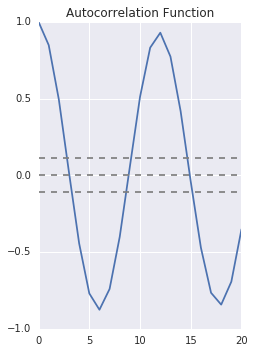

In [138]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts3_arr2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts3_arr2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

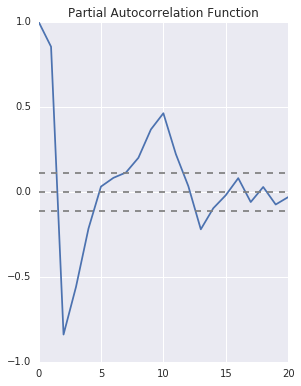

In [139]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts3_arr2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts3_arr2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [141]:
from statsmodels.tsa.arima_model import ARIMA

In [143]:
model = ARIMA(ts3_arr2, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts3_arr2)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts3_arr2)**2))

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'